<a href="https://colab.research.google.com/github/lcjln/Tour_datalab/blob/main/%EB%B3%B5%EC%A7%80%EA%B0%80%EB%8A%A5%EC%A7%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#기본 패키지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
!sudo apt-get install -y fonts-nanum
!apt-get -qq install fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Text(0.5, 1.0, '한글 보임')

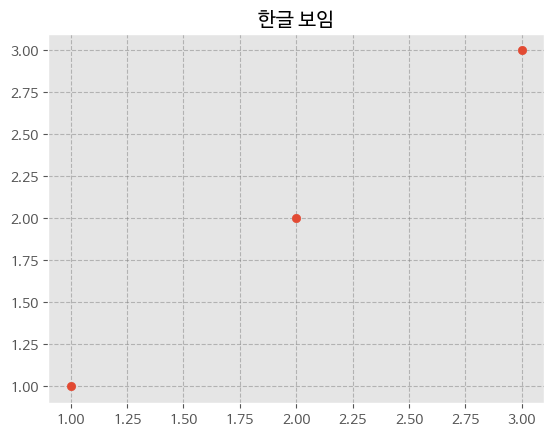

In [3]:
### 셀 실행 후 한글이 안보이면 런타임 다시 시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib.pyplot as plt

### 그래프 기본 설정
plt.style.use('ggplot')
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale','Solarize_Light2', 'tableau-colorblind10', '_classic_test']
plt.grid(True, axis='both', color='grey', alpha=0.5, linestyle='--')   # axis='y'
plt.rc('font', family='NanumBarunGothic')

plt.scatter([1,2,3],[1,2,3])    # plt 한글 확인
plt.title('한글 보임')

# 60대 이상 총방문자수 구하기

In [4]:
df = pd.read_csv('/content/2024년 국민여행조사 국내여행 RAWDATA.csv')
df.head()

/tmp/ipython-input-2182472147.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,

,아이디,공통] A_여행 횟수-1. 국내 관광/휴양 여행,공통] A_여행 횟수-2. 국내 가족/친지/친구 방문 여행 - 관광/휴양 활동 포함,공통] A_여행 횟수-3. 국내 단순 가족/친지/친구 방문 - 관광/휴양 활동이 포함되지 않음,공통] A_여행 횟수-4. 국내 출장/업무 여행 - 관광/휴양 활동 포함,공통] A_여행 횟수-5. 국내 단순 출장/업무 경험 - 관광/휴양 활동이 포함되지 않음,공통] A-1_여행경험_국내 가족/친지/친구 방문 여행-관광/휴양 활동,공통] A-2_여행경험_국내 가족/친지/친구 방문 여행-관광/휴양 활동 포함,공통] A-3_여행경험_국내 단순 가족/친지/친구 방문-관광/휴양 활동 포함되지 않음,공통] A-4_여행경험_국내 출장/업무 여행-관광/휴양 활동 포함,...,국내] 여행방문지_기타당일여행1,국내] 여행방문지_기타당일여행2,국내] 여행방문지_기타당일여행3,국내] 여행방문지_기타당일여행4,국내] 여행방문지_기타당일여행5,국내] 여행방문지_기타당일여행6,국내] 여행방문지_기타당일여행7,국내] 여행방문지_기타당일여행8,국내] 여행방문지_기타당일여행9,국내] 여행방문지_기타당일여행10
0,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
1,11010550271_275001,0,0,0,0,0,2.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010550271_275003,1,0,0,0,0,1.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010550271_275004,1,0,0,0,0,1.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010550271_275007,0,0,0,0,0,2.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 첫 행을 건너뛰고 두 번째 행을 컬럼으로
df = pd.read_csv("/content/2024년 국민여행조사 국내여행 RAWDATA.csv", header=1)

# 결과 확인
print(df.head())

/tmp/ipython-input-3740230682.py:2: DtypeWarning: Columns (183,355,527,699,1207) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/2024년 국민여행조사 국내여행 RAWDATA.csv", header=1)


                   ID  SA1_1  SA1_2  SA1_3  SA1_4  SA1_5  MON_EXP_1  \
0  11010550271_275001      0      0      0      0      0        2.0   
1  11010550271_275003      1      0      0      0      0        1.0   
2  11010550271_275004      1      0      0      0      0        1.0   
3  11010550271_275007      0      0      0      0      0        2.0   
4  11010550271_275008      0      0      0      0      0        2.0   

   MON_EXP_2  MON_EXP_3  MON_EXP_4  ...  국내_여행방문지_기타당일1 국내_여행방문지_기타당일2  \
0        2.0        2.0        2.0  ...             NaN            NaN   
1        2.0        2.0        2.0  ...             NaN            NaN   
2        2.0        2.0        2.0  ...             NaN            NaN   
3        2.0        2.0        2.0  ...             NaN            NaN   
4        2.0        2.0        2.0  ...             NaN            NaN   

   국내_여행방문지_기타당일3  국내_여행방문지_기타당일4  국내_여행방문지_기타당일5  국내_여행방문지_기타당일6  \
0             NaN             NaN             NaN          

In [6]:
# 1) 관광목적 여행만 추출
df = df[(df['SA1_1']==1) | (df['SA1_2']==2) |  (df['SA1_4']==1) | (df['MON_EXP_1']==1) | (df['MON_EXP_2']==1) | (df['MON_EXP_4']==1)]
df.head()

,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
1,11010550271_275003,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010550271_275004,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11010550271_275011,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11010680011_420482,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,11010680011_420489,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import re
import numpy as np
import pandas as pd

# df 원본이 이미 메모리에 있다고 가정
cols = df.columns.tolist()

# 방문지, 체류시간, 1인당 지출액, 여행유형 컬럼 찾기
spot_cols = [c for c in cols if re.fullmatch(r"D_TRA[12]_\d+_SPOT", c)]
stay_cols = [c for c in cols if re.fullmatch(r"D_TRA[12]_S_Day", c)]
one_cols  = [c for c in cols if re.fullmatch(r"D_TRA[12]_ONE_COST", c)]
case_cols = [c for c in cols if re.fullmatch(r"D_TRA[12]_CASE", c)]

# 연령 컬럼 확인
age_col = "BAGE" if "BAGE" in cols else None

# base_cols에 연령, 체류시간, 지출액, 여행유형 포함
base_cols = [c for c in ["ID", age_col] if c in cols] + stay_cols + one_cols + case_cols

# wide → long 변환
long_df = df.melt(
    id_vars=base_cols,
    value_vars=spot_cols,
    var_name="visit_col",
    value_name="SIG_CODE"
).dropna(subset=["SIG_CODE"])

# trip 번호 추출
long_df["trip"] = long_df["visit_col"].str.extract(r"D_TRA([12])_", expand=False)

# 확인
long_df

,ID,BAGE,D_TRA1_S_Day,D_TRA2_S_Day,D_TRA1_ONE_COST,D_TRA2_ONE_COST,D_TRA1_CASE,D_TRA2_CASE,visit_col,SIG_CODE,trip
0,11010550271_275003,4.0,1.0,NaN,340002.0,NaN,1.0,NaN,D_TRA1_1_SPOT,32030.0,1
1,11010550271_275004,3.0,1.0,NaN,303333.0,NaN,1.0,NaN,D_TRA1_1_SPOT,32030.0,1
2,11010550271_275011,2.0,1.0,NaN,313334.0,NaN,1.0,NaN,D_TRA1_1_SPOT,38090.0,1
3,11010680011_420482,4.0,0.0,NaN,16500.0,NaN,1.0,NaN,D_TRA1_1_SPOT,31270.0,1
4,11010680011_420489,6.0,0.0,NaN,35000.0,NaN,1.0,NaN,D_TRA1_1_SPOT,34060.0,1
...,...,...,...,...,...,...,...,...,...,...,...
611548,3304354285A_461559,3.0,0.0,2.0,150000.0,522500.0,3.0,1.0,D_TRA2_9_SPOT,39010.0,2
613033,34080110231_437853,6.0,0.0,2.0,50000.0,483333.0,3.0,1.0,D_TRA2_9_SPOT,39010.0,2
621487,1113071092A_643162,5.0,0.0,2.0,80000.0,720000.0,3.0,1.0,D_TRA2_10_SPOT,39010.0,2
645350,1113071092A_643162,5.0,0.0,2.0,80000.0,720000.0,3.0,1.0,D_TRA2_11_SPOT,39010.0,2


In [8]:
# 1) 60세 이상 필터링
df_age60 = df[df["BAGE"].isin([6, 7])]

# 2) spot 컬럼만 추출
spot_cols = [col for col in df_age60.columns if col.endswith("_SPOT")]

# 3) wide → long 변환 (SIG_CODE 생성)
long_df60 = df_age60.melt(value_vars=spot_cols, value_name="SIG_CODE").dropna(subset=["SIG_CODE"])

# 4) 시도 코드 생성
long_df60["SIDO_CODE"] = long_df60["SIG_CODE"].astype(str).str[:2]

# 5) 시도별 60+ 총방문자 수
visitors_60plus_sido = (
    long_df60.groupby("SIDO_CODE").size().reset_index(name="총방문자_60plus")
)

# 6) 시도명 매핑
sido_map = {
    "11":"서울특별시","21":"부산광역시","22":"대구광역시","23":"인천광역시","24":"광주광역시",
    "25":"대전광역시","26":"울산광역시","29":"세종특별자치시","31":"경기도","32":"강원특별자치도",
    "33":"충청북도","34":"충청남도","35":"전라북도","36":"전라남도","37":"경상북도","38":"경상남도","39":"제주특별자치도"
}
visitors_60plus_sido["시도명"] = visitors_60plus_sido["SIDO_CODE"].astype(str).map(sido_map)

# 7) 내림차순 정렬
visitors_60plus_sido = visitors_60plus_sido.sort_values("총방문자_60plus", ascending=False).reset_index(drop=True)

print(visitors_60plus_sido.sort_values("총방문자_60plus", ascending=False))

   SIDO_CODE  총방문자_60plus      시도명
0         36         1336     전라남도
1         39         1034  제주특별자치도
2         34          983     충청남도
3         38          963     경상남도
4         37          952     경상북도
5         32          878  강원특별자치도
6         31          825      경기도
7         35          767     전라북도
8         33          558     충청북도
9         21          388    부산광역시
10        11          251    서울특별시
11        23          198    인천광역시
12        22          143    대구광역시
13        25          121    대전광역시
14        26          119    울산광역시
15        24           75    광주광역시
16        29           37  세종특별자치시


In [9]:
from scipy.stats import zscore

# '총방문자_60plus'를 내림차순으로 정렬하고 '시도명' 컬럼만 선택
visitors_60plus_sido_sorted = visitors_60plus_sido.sort_values("총방문자_60plus", ascending=False)[["시도명", "총방문자_60plus"]]

# '총방문자_60plus' 컬럼을 z-score로 표준화
visitors_60plus_sido_sorted['총방문자_60plus_zscore'] = zscore(visitors_60plus_sido_sorted['총방문자_60plus'])

# 결과 확인
display(visitors_60plus_sido_sorted)



,시도명,총방문자_60plus,총방문자_60plus_zscore
0,전라남도,1336,1.875999
1,제주특별자치도,1034,1.139880
2,충청남도,983,1.015569
3,경상남도,963,0.966819
4,경상북도,952,0.940007
5,강원특별자치도,878,0.759633
6,경기도,825,0.630447
7,전라북도,767,0.489073
8,충청북도,558,-0.020360
9,부산광역시,388,-0.434732


# 지역별 배리어프리 관광지 개수 구하기

In [10]:
df1 = pd.read_csv('/content/한국관광공사_열린관광지목록_20220804.csv', encoding='cp949')
df1

,순번,지역분류,관광지명,설명,주소,연락처
0,1,인천광역시,인천 개항장역사문화공간,1883년 인천 개항장 126년 세월의 흔적이 쌓인 개항기 역사와 문화의 만남의 장...,인천광역시 중구 제물량로232번안길 27,인천 중구 문화유산팀 032-760-6448
1,2,인천광역시,인천 월미문화의거리,"인천의 대표적인 관광지 중의 하나인 월미도에는 월미도 문화의 거리, 월미공원, 월미...",인천광역시 중구 월미로 252,032-764-0842
2,3,인천광역시,인천 연안부두해양광장,서해 도서로 운항하는 여객선의 출발지이다. 싱싱한 생선과 젓갈 등을 저렴한 가격으로...,인천광역시 중구 연안부두로 70 (항동7가),032-777-1330
3,4,인천광역시,인천 하나개해수욕장,하나개해수욕장은 샘꾸미 선착장에서 차로 10분이면 도착할 수 있다. 무의도에서 가장...,인천광역시 중구 무의동 산189번지 (무의동),032-751-8833
4,5,경기도,양평 세미원,"세미원 연꽃박물관은 연꽃이라는 단일한 테마 아래 연꽃관련 생활 용품, 고서, 음식 ...",경기도 양평군 양서면 양수로 93,031-775-1835
...,...,...,...,...,...,...
107,108,강원도,정선 삼탄아트마인,삼탄아트마인은 1964년에서 2001년까지 삼척탄좌가 있던 자리다. 그 터 위에 옛...,강원도 정선군 고한읍 함백산로 1445-44,033 591-3001
108,109,제주특별자치도,제주 사려니 숲길삼나무숲,"사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를 시작으로 물찻오름과 사...",제주특별자치도 서귀포시 표선면 가시리 붉은오름 입구,사려니숲길 탐방안내소 064-900-8800
109,110,제주특별자치도,제주 서귀포 치유의숲,산림욕은 어떻게 해야 더 효과적일까?' 이런 막연한 의문이 든다면 서귀포 치유의 숲...,제주특별자치도 서귀포시 산록남로 2271,064-760-3067~8
110,111,제주특별자치도,제주 붉은 오름 자연휴양림,붉은오름자연휴양림은 자연을 전혀 훼손하지 않은 자연 그대로의 휴양림으로 서귀포시와 ...,제주특별자치도 서귀포시 표선면 남조로 1487-73,064-760-3481


In [11]:
df1['지역분류'].value_counts()

,count
지역분류,
전라북도,33
강원도,17
경상남도,12
전라남도,11
충청북도,9
경기도,9
충청남도,6
인천광역시,4
제주특별자치도,4


In [26]:
from scipy.stats import zscore

# df1['지역분류'] value_counts 계산
region_counts = df1['지역분류'].value_counts()

# z-score 계산
region_counts_zscore = zscore(region_counts)

# 결과 확인
print("지역분류 value_counts의 z-score:")
print(region_counts_zscore)

지역분류 value_counts의 z-score:
[ 2.89380085  0.99502931  0.40166321  0.28298999  0.04564355  0.04564355
 -0.31037612 -0.54772256 -0.54772256 -0.66639578 -0.785069   -0.90374222
 -0.90374222]


In [27]:
# value counts와 z-score를 데이터프레임으로 생성
region_counts_df = pd.DataFrame({
    '지역분류': region_counts.index,
    '갯수': region_counts.values,
    'z-score': region_counts_zscore
})

# 결과 확인
display(region_counts_df)

,지역분류,갯수,z-score
0,전라북도,33,2.893801
1,강원도,17,0.995029
2,경상남도,12,0.401663
3,전라남도,11,0.282990
4,충청북도,9,0.045644
5,경기도,9,0.045644
6,충청남도,6,-0.310376
7,인천광역시,4,-0.547723
8,제주특별자치도,4,-0.547723
9,대구광역시,3,-0.666396


# 지역별 복지센터 개수 구하기

In [13]:
df2 = pd.read_csv('/content/보건복지부_장애인복지관 현황_20240425.csv',encoding='cp949')
df2

,연번,시도,시군구,시설유형,법인현황,시설명,시설 주소,전화번호,팩스번호,종사자정원,종사자 현원,엑스(X)좌표,와이(Y)좌표
0,1,서울특별시,강남구,복지관,사복)사회복지법인 대한불교조계종 봉은,강남장애인복지관,강남구 개포로 605,02-445-8006,NaN,30.0,30.0,127.073472,37.491983
1,2,서울특별시,강남구,복지관,사복)밀알복지재단,강남세움복지관,강남구 광평로60길 22,02-2184-8700,02-2184-8719,47.0,47.0,127.119432,37.470582
2,3,서울특별시,강남구,복지관,사복)자애종합복지원,성모자애복지관,강남구 헌릉로757길 35,02-3411-9581,02-3411-9584,37.0,46.0,127.042367,37.509378
3,4,서울특별시,강남구,복지관,사복)한국청각장애인복지회,청음복지관,강남구 봉은사로50길 6,02-556-3493,02-555-4241,37.0,34.0,127.037067,37.503703
4,5,서울특별시,강남구,복지관,충현복지재단,충현복지관,강남구 논현로98길 16,02-2192-0600,02-2192-0696,42.0,57.0,127.075127,37.492554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,262,제주특별자치도,제주시,복지관,사회복지법인 농애원,제주도농아복지관,제주특별자치도 제주시 우령서로16길 19(외도일동),064-711-9094,064-711-9097,28.0,33.0,NaN,NaN
262,263,제주특별자치도,제주시,복지관,제주특별자치도사회서비스원,우리복지관,제주시 산천단남길 40,064-758-7942,064-758-7943,26.0,29.0,NaN,NaN
263,264,제주특별자치도,제주시,복지관,한국지체장애인협회,탐라장애인종합복지관,제주시 광양4길 32,064-710-9990,064-710-9999,64.0,64.0,NaN,NaN
264,265,제주특별자치도,제주시,복지관,춘강,제주특별자치도장애인종합복지관,제주시 516로3120,064-702-0295,064-702-0294,42.0,52.0,NaN,NaN


In [15]:
df2['시도'].value_counts()

,count
시도,
서울특별시,51
경기도,39
경상남도,22
경상북도,20
전라남도,18
충청남도,17
부산광역시,17
전라북도,14
충청북도,12


In [16]:
from scipy.stats import zscore

# df2['시도'] value_counts 계산
sido_counts = df2['시도'].value_counts()

# z-score 계산
sido_counts_zscore = zscore(sido_counts)

# value counts와 z-score를 데이터프레임으로 생성
sido_counts_df = pd.DataFrame({
    '시도': sido_counts.index,
    '갯수': sido_counts.values,
    'z-score': sido_counts_zscore
})

# 결과 확인
display(sido_counts_df)

,시도,갯수,z-score
0,서울특별시,51,2.891161
1,경기도,39,1.909802
2,경상남도,22,0.519543
3,경상북도,20,0.355983
4,전라남도,18,0.192423
5,충청남도,17,0.110643
6,부산광역시,17,0.110643
7,전라북도,14,-0.134696
8,충청북도,12,-0.298256
9,강원도,11,-0.380036


# 시도별 장애인 수 구하기 (2023년 기준)

In [17]:
df3 = pd.read_csv('/content/보건복지부_등록장애인 수_장애종별_시도별_20231231.csv',encoding='cp949')
df3

,연도,시도,지체장애_남,지체장애_여,시각장애_남,시각장애_여,청각장애_남,청각장애_여,언어장애_남,언어장애_여,...,호흡기장애_남,호흡기장애_여,간장애_남,간장애_여,안면장애_남,안면장애_여,장루요루장애_남,장루요루장애_여,뇌전증장애_남,뇌전증장애_여
0,2023,서울특별시,90378,70025,24368,16338,35038,28820,2344,964,...,1545,567,1899,891,219,174,1933,1189,655,564
1,2023,부산광역시,43949,29987,10359,7224,14871,12327,1118,475,...,670,252,646,291,136,90,741,457,315,237
2,2023,대구광역시,29874,19802,6973,4881,14456,14323,825,329,...,304,83,510,248,86,61,401,283,178,149
3,2023,인천광역시,40913,25696,8248,5546,14956,13104,1069,437,...,432,164,518,273,83,64,648,360,202,191
4,2023,광주광역시,15924,12416,4163,2934,5433,4824,428,181,...,189,84,295,122,37,26,260,173,134,134
5,2023,대전광역시,18306,12412,4022,2789,5334,4726,429,189,...,206,66,264,123,59,23,279,148,143,120
6,2023,울산광역시,14120,8512,2836,1952,4652,3385,324,127,...,193,60,273,115,52,24,172,98,64,56
7,2023,세종시,3549,2235,776,455,934,872,102,26,...,38,20,57,28,9,5,53,36,17,8
8,2023,경기도,157309,103361,33400,21285,48379,41038,3789,1477,...,1766,709,2788,1258,388,263,2576,1457,773,655
9,2023,강원도,28194,19992,5343,3867,7938,7080,546,241,...,356,96,384,175,61,43,432,274,132,90


In [18]:
# '총 장애인 수' 컬럼 생성
df3['총 장애인 수'] = df3.loc[:, '지체장애_남':].sum(axis=1)

# 결과 확인
display(df3[['시도', '총 장애인 수']].head(17))

,시도,총 장애인 수
0,서울특별시,389795
1,부산광역시,175467
2,대구광역시,130520
3,인천광역시,152226
4,광주광역시,69314
5,대전광역시,71440
6,울산광역시,51383
7,세종시,12944
8,경기도,586421
9,강원도,100520


In [19]:
from scipy.stats import zscore

# '총 장애인 수' 컬럼의 z-score 계산
total_disabled_zscore = zscore(df3['총 장애인 수'])

# '시도', '총 장애인 수', z-score를 데이터프레임으로 생성
disabled_counts_df = pd.DataFrame({
    '시도': df3['시도'],
    '총 장애인 수': df3['총 장애인 수'],
    'z-score': total_disabled_zscore
})

# 결과 확인
display(disabled_counts_df)

,시도,총 장애인 수,z-score
0,서울특별시,389795,1.733305
1,부산광역시,175467,0.148353
2,대구광역시,130520,-0.184029
3,인천광역시,152226,-0.023513
4,광주광역시,69314,-0.636646
5,대전광역시,71440,-0.620924
6,울산광역시,51383,-0.769246
7,세종시,12944,-1.053501
8,경기도,586421,3.187350
9,강원도,100520,-0.405878


In [28]:
# 데이터프레임 이름 통일 및 시도명 매핑 (필요시)
# visitors_60plus_sido_sorted는 이미 시도명 컬럼이 있습니다.
# region_counts_df는 지역분류 컬럼을 시도명으로 변경합니다.
region_counts_df = region_counts_df.rename(columns={'지역분류': '시도명'})

# disabled_counts_df는 시도 컬럼을 시도명으로 변경합니다.
disabled_counts_df = disabled_counts_df.rename(columns={'시도': '시도명'})

# 세 데이터프레임을 시도명 기준으로 통합
merged_zscores = pd.merge(visitors_60plus_sido_sorted, region_counts_df, on='시도명', how='outer')
merged_zscores = pd.merge(merged_zscores, disabled_counts_df, on='시도명', how='outer')

# 컬럼 이름 변경
merged_zscores = merged_zscores.rename(columns={
    '총방문자_60plus_zscore': '60대_총방문자_zscore',
    '갯수_x': '배리어프리_관광지수',
    'z-score_x': '배리어프리_관광지수_zscore',
    '총 장애인 수': '총_장애인수',
    '갯수_y': '복지센터_갯수',
    'z-score_y': '복지센터_갯수_zscore',
    '총 장애인 수': '총_장애인수',
    'z-score': '총_장애인수_zscore'
})


# 결과 확인
display(merged_zscores)

,시도명,총방문자_60plus,60대_총방문자_zscore,갯수,배리어프리_관광지수_zscore,총_장애인수,복지센터_갯수_zscore
0,강원도,NaN,NaN,17.0,0.995029,100520.0,-0.405878
1,강원특별자치도,878.0,0.759633,NaN,NaN,NaN,NaN
2,경기도,825.0,0.630447,9.0,0.045644,586421.0,3.187350
3,경상남도,963.0,0.966819,12.0,0.401663,188825.0,0.247135
4,경상북도,952.0,0.940007,2.0,-0.785069,178341.0,0.169607
5,광주광역시,75.0,-1.197663,NaN,NaN,69314.0,-0.636646
6,대구광역시,143.0,-1.031914,3.0,-0.666396,130520.0,-0.184029
7,대전광역시,121.0,-1.085539,NaN,NaN,71440.0,-0.620924
8,부산광역시,388.0,-0.434732,1.0,-0.903742,175467.0,0.148353
9,서울특별시,251.0,-0.768666,NaN,NaN,389795.0,1.733305


In [46]:
df10 = visitors_60plus_sido_sorted
df10 = df10.drop(columns=['총방문자_60plus_zscore'])
df10["시도명"] = df10["시도명"].replace({"강원특별자치도": "강원도"})
df10

,시도명,총방문자_60plus
0,전라남도,1336
1,제주특별자치도,1034
2,충청남도,983
3,경상남도,963
4,경상북도,952
5,강원도,878
6,경기도,825
7,전라북도,767
8,충청북도,558
9,부산광역시,388


In [30]:
df11 = region_counts_df
df11 = df11.rename(columns={'갯수': '배리어프리 관광지 개수'})
df11 = df11.drop(columns=['z-score'])
df11

,시도명,배리어프리 관광지 개수
0,전라북도,33
1,강원도,17
2,경상남도,12
3,전라남도,11
4,충청북도,9
5,경기도,9
6,충청남도,6
7,인천광역시,4
8,제주특별자치도,4
9,대구광역시,3


In [31]:
df12 = sido_counts_df
df12 = df12.rename(columns={'갯수': '복지센터 개수', '시도':'시도명'})
df12 = df12.drop(columns=['z-score'])
df12

,시도명,복지센터 개수
0,서울특별시,51
1,경기도,39
2,경상남도,22
3,경상북도,20
4,전라남도,18
5,충청남도,17
6,부산광역시,17
7,전라북도,14
8,충청북도,12
9,강원도,11


In [32]:
df13 = disabled_counts_df
df13 = df13.drop(columns=['z-score'])
df13

,시도명,총 장애인 수
0,서울특별시,389795
1,부산광역시,175467
2,대구광역시,130520
3,인천광역시,152226
4,광주광역시,69314
5,대전광역시,71440
6,울산광역시,51383
7,세종시,12944
8,경기도,586421
9,강원도,100520


In [33]:
# '세종시' 데이터를 '충청남도'로 변경
df13['시도명'] = df13['시도명'].replace('세종시', '충청남도')

# '시도명'으로 그룹화하고 합계 계산
df13 = df13.groupby('시도명').sum().reset_index()

# 결과 확인
display(df13)

,시도명,총 장애인 수
0,강원도,100520
1,경기도,586421
2,경상남도,188825
3,경상북도,178341
4,광주광역시,69314
5,대구광역시,130520
6,대전광역시,71440
7,부산광역시,175467
8,서울특별시,389795
9,울산광역시,51383


In [47]:
# df13을 기준으로 df10, df11, df12 병합
merged_df_final = pd.merge(df13, df10, on='시도명', how='left')
merged_df_final = pd.merge(merged_df_final, df11, on='시도명', how='left')
merged_df_final = pd.merge(merged_df_final, df12, on='시도명', how='left')

# 결과 확인
display(merged_df_final)

,시도명,총 장애인 수,총방문자_60plus,배리어프리 관광지 개수,복지센터 개수
0,강원도,100520,878,17.0,11
1,경기도,586421,825,9.0,39
2,경상남도,188825,963,12.0,22
3,경상북도,178341,952,2.0,20
4,광주광역시,69314,75,NaN,7
5,대구광역시,130520,143,3.0,6
6,대전광역시,71440,121,NaN,8
7,부산광역시,175467,388,1.0,17
8,서울특별시,389795,251,NaN,51
9,울산광역시,51383,119,1.0,5


In [48]:
# merged_df_final에서 NaN을 전부 0으로 치환
merged_df_final = merged_df_final.fillna(0)

# 결과 확인
display(merged_df_final)

,시도명,총 장애인 수,총방문자_60plus,배리어프리 관광지 개수,복지센터 개수
0,강원도,100520,878,17.0,11
1,경기도,586421,825,9.0,39
2,경상남도,188825,963,12.0,22
3,경상북도,178341,952,2.0,20
4,광주광역시,69314,75,0.0,7
5,대구광역시,130520,143,3.0,6
6,대전광역시,71440,121,0.0,8
7,부산광역시,175467,388,1.0,17
8,서울특별시,389795,251,0.0,51
9,울산광역시,51383,119,1.0,5


In [49]:
from scipy.stats import zscore

# '시도명' 컬럼을 제외한 나머지 컬럼들에 대해 z-score 계산
for col in merged_df_final.columns:
    if col != '시도명':
        merged_df_final[col + '_zscore'] = zscore(merged_df_final[col])

# 결과 확인
display(merged_df_final)

,시도명,총 장애인 수,총방문자_60plus,배리어프리 관광지 개수,복지센터 개수,총 장애인 수_zscore,총방문자_60plus_zscore,배리어프리 관광지 개수_zscore,복지센터 개수_zscore
0,강원도,100520,878,17.0,11,-0.480925,0.695918,1.203859,-0.454406
1,경기도,586421,825,9.0,39,3.136525,0.563511,0.240772,1.858933
2,경상남도,188825,963,12.0,22,0.176491,0.908269,0.601929,0.454406
3,경상북도,178341,952,2.0,20,0.098439,0.880788,-0.601929,0.289167
4,광주광역시,69314,75,0.0,7,-0.713248,-1.310174,-0.842701,-0.784883
5,대구광역시,130520,143,3.0,6,-0.257580,-1.140293,-0.481543,-0.867502
6,대전광역시,71440,121,0.0,8,-0.697420,-1.195255,-0.842701,-0.702264
7,부산광역시,175467,388,1.0,17,0.077043,-0.528223,-0.722315,0.041310
8,서울특별시,389795,251,0.0,51,1.672678,-0.870483,-0.842701,2.850364
9,울산광역시,51383,119,1.0,5,-0.846741,-1.200251,-0.722315,-0.950121


In [60]:
# 복지지수 계산 (가중치 적용)
# 총 장애인 z점수 (총_장애인수_zscore): 0.3
# 복지센터 z점수 (복지센터_갯수_zscore): 0.5
# 총 장애인수 z점수 (총_장애인수_zscore): 0.2

merged_df_final['복지지수'] = (
    merged_df_final['배리어프리 관광지 개수_zscore'] * 0.4 +
    merged_df_final['복지센터 개수_zscore'] * 0.5 +
    merged_df_final['총 장애인 수_zscore'] * 0.1
)

# 결과 확인
display(merged_df_final[['시도명', '복지지수']].sort_values(by='복지지수', ascending=False))

,시도명,복지지수
1,경기도,1.339428
8,서울특별시,1.255369
12,전라북도,1.122734
2,경상남도,0.485624
11,전라남도,0.233255
0,강원도,0.206248
14,충청남도,-0.041027
3,경상북도,-0.086344
15,충청북도,-0.140211
7,부산광역시,-0.260567


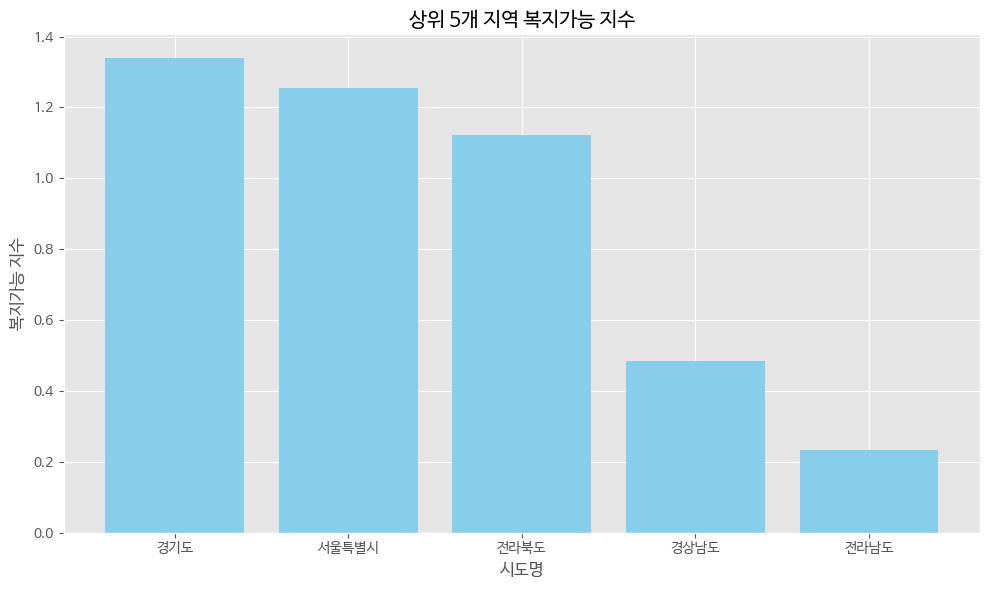

In [64]:
import matplotlib.pyplot as plt

# '복지지수'를 기준으로 내림차순 정렬하고 상위 5개 선택
top_5_welfare = merged_df_final.sort_values(by='복지지수', ascending=False).head(5)

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_5_welfare['시도명'], top_5_welfare['복지지수'], color = 'skyblue')
plt.title('상위 5개 지역 복지가능 지수')
plt.xlabel('시도명')
plt.ylabel('복지가능 지수')

plt.tight_layout()
plt.show()